In [2]:
import pandas as pd

In [4]:
df1 = pd.read_csv("202403-Cyclistic.csv")

In [6]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,day_of_week,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 15
0,9F3D0A2D98D84F32,electric_bike,3/13/24 14:15,3/13/24 14:15,4,31,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.69,casual,NaN
1,FAEE7A0555139F1B,electric_bike,3/13/24 21:33,3/13/24 21:33,4,31,NaN,NaN,NaN,NaN,41.89,-87.66,41.89,-87.66,casual,NaN
2,82C6C941E1474A75,electric_bike,3/2/24 13:08,3/2/24 13:09,7,31,NaN,NaN,NaN,NaN,41.92,-87.65,41.92,-87.65,member,NaN
3,105D379F4E661F45,electric_bike,3/13/24 20:29,3/13/24 20:30,4,31,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.69,member,NaN
4,050D438E62E5E6BD,electric_bike,3/3/24 11:03,3/3/24 11:03,1,31,NaN,NaN,NaN,NaN,41.71,-87.61,41.71,-87.61,casual,NaN


In [8]:
import matplotlib.pyplot as plt

In [10]:
df1_weekday_count = df1[['day_of_week','member_casual']].value_counts()

In [12]:
df1_weekday_count.head(14)

day_of_week  member_casual
3            member           34225
4            member           33212
2            member           32394
7            member           32139
5            member           30087
6            member           28148
1            member           25813
7            casual           19666
1            casual           14643
2            casual           10188
3            casual            9734
6            casual            9576
4            casual            8868
5            casual            8569
Name: count, dtype: int64

In [14]:
weekday_count_df = df1_weekday_count.reset_index()
weekday_count_df.columns = ['day_of_week', 'member_casual' , 'count']
weekday_count_df.head(15)

,day_of_week,member_casual,count
0,3,member,34225
1,4,member,33212
2,2,member,32394
3,7,member,32139
4,5,member,30087
5,6,member,28148
6,1,member,25813
7,7,casual,19666
8,1,casual,14643
9,2,casual,10188


In [16]:
pivot_df1 = weekday_count_df.pivot_table(index='day_of_week' , columns='member_casual' , values='count')
pivot_df1

member_casual,casual,member
day_of_week,,
1,14643.0,25813.0
2,10188.0,32394.0
3,9734.0,34225.0
4,8868.0,33212.0
5,8569.0,30087.0
6,9576.0,28148.0
7,19666.0,32139.0


In [18]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_df1['weekday'] = weekday

<Axes: xlabel='weekday'>

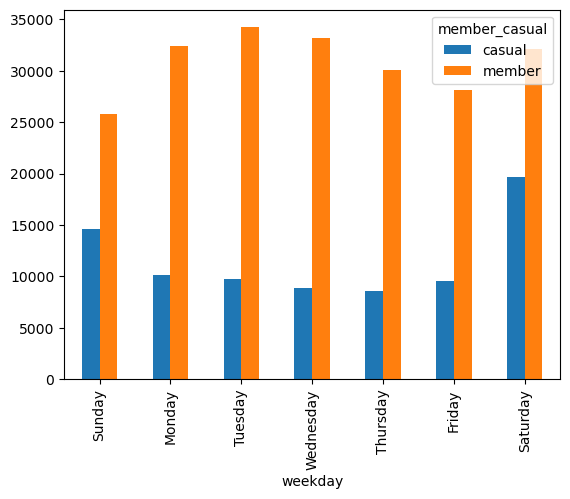

In [20]:
pivot_df1.plot(kind='bar' , x='weekday')

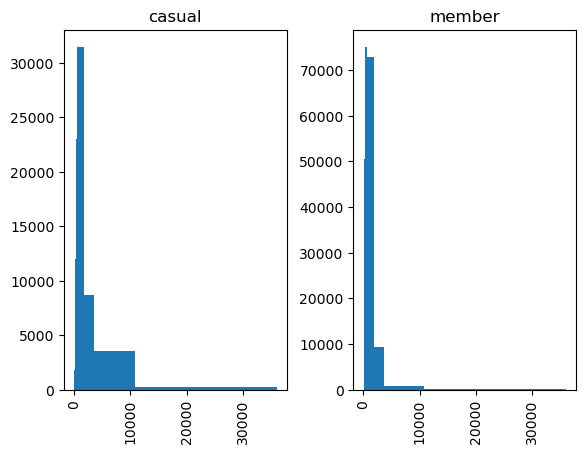

In [22]:
df1.hist(column='ride_length', bins=[30,120,300,600,1800,3600,10800,36000], by='member_casual')
plt.show()

In [24]:
df1_weekday_bike_membership = df1[['day_of_week','member_casual' , 'rideable_type']].value_counts()

In [26]:
weekday_bike_membership = df1_weekday_bike_membership.reset_index()

In [28]:
weekday_bike_membership.columns = ['day_of_week' , 'member_casual' , 'rideable_type' , 'count']

In [30]:
pivot_wbm = weekday_bike_membership.pivot_table(index = 'day_of_week' , columns = ['member_casual' , 'rideable_type'] , values = 'count')

In [32]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_wbm['weekday'] = weekday

<Axes: xlabel='weekday'>

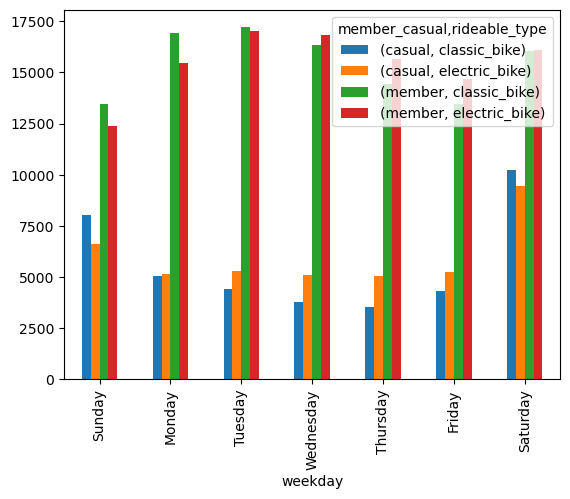

In [34]:
pivot_wbm.plot(kind = 'bar' , x='weekday')

In [36]:
import folium

In [38]:
from folium.plugins import HeatMap

In [40]:
m = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)


In [42]:
member_geo_data = df1[df1['member_casual']=='member']
member_geo_data = member_geo_data[['start_lat' , 'start_lng']]

In [44]:
member_geo_data.head()

,start_lat,start_lng
2,41.920000,-87.650000
3,41.970000,-87.690000
6,41.890000,-87.640000
8,41.880000,-87.650000
10,41.870816,-87.631246


In [46]:
HeatMap(member_geo_data).add_to(m)

In [50]:
m.save('heatmapmember-March.html')

In [52]:
casual_geo_data = df1[df1['member_casual']=='casual']
casual_geo_route = casual_geo_data[['start_lat' , 'start_lng' , 'end_lat' , 'end_lng']]
casual_geo_data = casual_geo_data[['start_lat' , 'start_lng']]

In [54]:
m1 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [56]:
HeatMap(casual_geo_data).add_to(m1)

In [58]:
m1.save('heatmapcasual-March.html')

In [60]:
m2 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [62]:
casual_geo_route.head()

,start_lat,start_lng,end_lat,end_lng
0,41.97,-87.69,41.97,-87.69
1,41.89,-87.66,41.89,-87.66
4,41.71,-87.61,41.71,-87.61
5,41.97,-87.69,41.97,-87.69
7,41.89,-87.62,41.89,-87.62


In [72]:
casual_geo_route = casual_geo_route.dropna()
for index in casual_geo_route.index:
    route = [[casual_geo_route.loc[index, 'start_lat'] ,casual_geo_route.loc[index,'start_lng']] , [casual_geo_route.loc[index,'end_lat'], casual_geo_route.loc[index,'end_lng']]] 
    folium.PolyLine(locations = route , color='blue' , weight=0.5 , opacity = 0.4).add_to(m2)

In [74]:
m2.save('routesCasual-March.html')